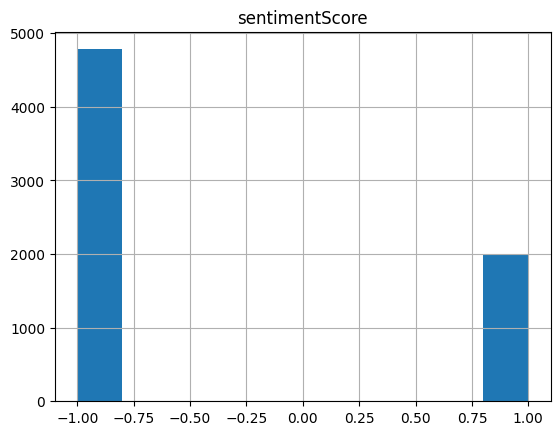

'\n# Function to perform sentiment analysis\ndef analyze_sentiment(text):\n    words = text.lower().split()\n\n    #Initialize a sentiment score to keep track of the sentiment of the text.\n    sentiment_score = 0\n\n    # Count positive and negative words #Loop through the words in the preprocessed text and adjust the sentiment score based on the presence of words in positive and negative lists.\n    for word in words:\n        if word in positive_words:\n            sentiment_score += 1\n        elif word in negative_words:\n            sentiment_score -= 1\n\n    # Classify sentiment based on score\n    if sentiment_score > 0:\n        return "Positive"\n    elif sentiment_score < 0:\n        return "Negative"\n    else:\n        return "Neutral"\n\n# Input loop to start program\nrun = 1\nwhile run:\n    input_text = input("Write a sentence to analyze (Type \'exit\' to close):")\n    if input_text != "exit":\n        sentiment = analyze_sentiment(input_text)\n        print(f"Sentime

In [ ]:
import pandas as pd
from matplotlib import pyplot
import csv
import os

# Read the positive and negative text files into lists with the correct encoding
with open('data/positive-words.txt', 'r', encoding='ISO-8859-1') as file:
    positive_words = file.read().splitlines()

with open('data/negative-words.txt', 'r', encoding='ISO-8859-1') as file:
    negative_words = file.read().splitlines()

# create words list and add words and sentiment score to it

words = []

for word in positive_words:
    data = [{"word": str(word), "sentimentScore": 1}]
    words = words + data

for word in negative_words:
    data = [{"word": str(word), "sentimentScore": -1}]
    words = words + data

# create and add words to csv file

file_path = "data/words.csv"

if os.path.exists(file_path):
    os.remove(file_path)

with open(file_path, 'w', newline='') as csvFile:
    fieldnames = ['word',"sentimentScore"]
    writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(words)

# Create dataframe for words and tweets
df_words = pd.read_csv(file_path)

df_Tweets = pd.read_csv("data/test.csv")

#create histogram for words

df_words.hist()

# Function to perform sentiment analysis
def analyze_sentiment(text):
    sentence = text.lower().split()
    
    #Initialize a sentiment score to keep track of the sentiment of the text.
    sentiment_score = 0

    #Loop through the words in the preprocessed text and adjust the sentiment score based on the presence of words in sentence.
    for word in sentence:
        matching_rows = []
        with open(file_path, 'r', newline='') as csvFile:
            csv_reader = csv.reader(csvFile)
            for row in csv_reader:
                if any(word in field for field in row):
                    matching_rows.append(row)
    
    #Loop through the matching rows and add up the sentiment score
    for row in matching_rows:
        sentiment_score += int(row[1])

    # Classify sentiment based on score
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"
    
# Input loop to start program
run = 1
while run:
    input_text = input("Write a sentence to analyze (Type 'exit' to close):")
    if input_text != "exit":
        sentiment = analyze_sentiment(input_text)
        print(f"Sentiment: {sentiment}")
    else:
        run = 0